# Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check data

In [2]:
df = pd.read_csv('./datasets/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessiong and selection

In [3]:
cdf = df[['age', 'sex', 'cp', 'fbs', 'restecg', 'thalachh' ,'exng' ,'oldpeak' ,'slp' ,'caa' ,'thall' ,'output']]
cdf.head()
cdf.describe()

,age,sex,cp,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
X = cdf.drop('output', axis=1)
y = cdf['output']

# Transform to array

In [5]:
X = np.array(X)
y = np.array(y)

# Normalize

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train / Test Split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(212, 11) (212,)
(91, 11) (91,)


# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.03, solver='newton-cg')
model.fit(x_train, y_train)

LogisticRegression(C=0.03, solver='newton-cg')

# Predict test data

In [9]:
yhat = model.predict(x_test)

# Evaluation

In [10]:
from sklearn.metrics import jaccard_score , classification_report, confusion_matrix
import itertools

### Jaccard score

In [11]:
jaccard_score(y_test, yhat, pos_label=1)

0.8679245283018868

### Classification_report

In [12]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.90      0.96      0.93        48

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



### Confusion_matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[46  2]
 [ 5 38]]


Confusion matrix, without normalization
[[46  2]
 [ 5 38]]


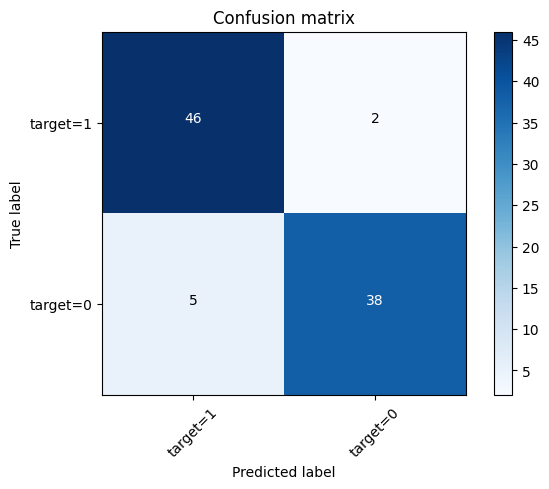

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')